In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import gc

from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
DATA_PATH = "/content/drive/MyDrive/SU Works/CPSC_5305_Intro_to_DS/data"

In [50]:
def reduce_mem_usage(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtype
        # Attempt to downcast numerical columns
        if pd.api.types.is_integer_dtype(col_type):
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif pd.api.types.is_float_dtype(col_type):
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    if verbose: print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [51]:
file_map = {
    'calendar': 'calendar.csv',
    'sell_prices': 'sell_prices.csv',
    'sales': 'sales_train_evaluation.csv'
}

loaded_dfs = {}
for df_name, file_name in file_map.items():
    print(f"\nOptimizing {df_name}...")
    loaded_dfs[df_name] = reduce_mem_usage(pd.read_csv(f'{DATA_PATH}/{file_name}'))

calendar = loaded_dfs['calendar']
sell_prices = loaded_dfs['sell_prices']
sales = loaded_dfs['sales']


Optimizing calendar...
Memory usage after optimization is: 0.12 MB
Decreased by 41.9%

Optimizing sell_prices...
Memory usage after optimization is: 143.53 MB
Decreased by 31.2%

Optimizing sales...
Memory usage after optimization is: 95.61 MB
Decreased by 78.9%


In [52]:
print(calendar.head().to_markdown())

|    | date       |   wm_yr_wk | weekday   |   wday |   month |   year | d   |   event_name_1 |   event_type_1 |   event_name_2 |   event_type_2 |   snap_CA |   snap_TX |   snap_WI |
|---:|:-----------|-----------:|:----------|-------:|--------:|-------:|:----|---------------:|---------------:|---------------:|---------------:|----------:|----------:|----------:|
|  0 | 2011-01-29 |      11101 | Saturday  |      1 |       1 |   2011 | d_1 |            nan |            nan |            nan |            nan |         0 |         0 |         0 |
|  1 | 2011-01-30 |      11101 | Sunday    |      2 |       1 |   2011 | d_2 |            nan |            nan |            nan |            nan |         0 |         0 |         0 |
|  2 | 2011-01-31 |      11101 | Monday    |      3 |       1 |   2011 | d_3 |            nan |            nan |            nan |            nan |         0 |         0 |         0 |
|  3 | 2011-02-01 |      11101 | Tuesday   |      4 |       2 |   2011 | d_4 |       

In [ ]:
# convert date column to datetime objects and set it as the index
calendar['date'] = pd.to_datetime(calendar['date'])

In [ ]:
calendar.shape

(1969, 14)

### Calendar

In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int16         
 2   weekday       1969 non-null   object        
 3   wday          1969 non-null   int8          
 4   month         1969 non-null   int8          
 5   year          1969 non-null   int16         
 6   d             1969 non-null   object        
 7   event_name_1  162 non-null    object        
 8   event_type_1  162 non-null    object        
 9   event_name_2  5 non-null      object        
 10  event_type_2  5 non-null      object        
 11  snap_CA       1969 non-null   int8          
 12  snap_TX       1969 non-null   int8          
 13  snap_WI       1969 non-null   int8          
dtypes: datetime64[ns](1), int16(2), int8(5), object(6)
memory usage: 125.1+ KB


In [ ]:
print(calendar.isnull().sum().to_markdown())

|              |    0 |
|:-------------|-----:|
| date         |    0 |
| wm_yr_wk     |    0 |
| weekday      |    0 |
| wday         |    0 |
| month        |    0 |
| year         |    0 |
| d            |    0 |
| event_name_1 | 1807 |
| event_type_1 | 1807 |
| event_name_2 | 1964 |
| event_type_2 | 1964 |
| snap_CA      |    0 |
| snap_TX      |    0 |
| snap_WI      |    0 |


Calendar has 4 features with lots of missing values. These indicate that there are no events on those particular days. The file "calendar.csv" contains the following columns for events:
*   `event_name_1`: The name of the first event on a given date.
*   `event_type_1`: The type of the first event.
*   `event_name_2`: The name of a second event on the same date, if applicable.
*   `event_type_2`: The type of the second event.

In [ ]:
event_columns = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']

for col in event_columns:
    # Get unique values and convert to a list before sorting
    unique_vals = list(calendar[col].dropna().unique())
    unique_vals.sort()
    print(f"\nUnique values for '{col}' ({len(unique_vals)} unique entries, excluding NaN):")
    if len(unique_vals) > 0:
        for val in unique_vals:
            print(f"- {val}")


Unique values for 'event_name_1' (30 unique entries, excluding NaN):
- Chanukah End
- Christmas
- Cinco De Mayo
- ColumbusDay
- Easter
- Eid al-Fitr
- EidAlAdha
- Father's day
- Halloween
- IndependenceDay
- LaborDay
- LentStart
- LentWeek2
- MartinLutherKingDay
- MemorialDay
- Mother's day
- NBAFinalsEnd
- NBAFinalsStart
- NewYear
- OrthodoxChristmas
- OrthodoxEaster
- Pesach End
- PresidentsDay
- Purim End
- Ramadan starts
- StPatricksDay
- SuperBowl
- Thanksgiving
- ValentinesDay
- VeteransDay

Unique values for 'event_type_1' (4 unique entries, excluding NaN):
- Cultural
- National
- Religious
- Sporting

Unique values for 'event_name_2' (4 unique entries, excluding NaN):
- Cinco De Mayo
- Easter
- Father's day
- OrthodoxEaster

Unique values for 'event_type_2' (2 unique entries, excluding NaN):
- Cultural
- Religious


Some of the events have a start and a end day, does it make sense to insert related events in between to as an imputation technique?\
Possible entries include, Chanukah End,

**Example**
Where the event is `NBAFinalsStart` and `NBAFinalsEnd`, we can say that for all dates between these two specific dates, the NBA Finals event is ongoing. Even though the calendar might only explicitly mark the start and end, the 'NBA Finals' event influences the entire period.

# Hypothetical Scenario

## Original Calendar Entry:

| Date | event_name_1 | event_type_1 |
|------------|------------------|--------------|
| 2019-06-06 | NBAFinalsStart | Sporting |
| 2019-06-07 | NaN | NaN |
| 2019-06-08 | NaN | NaN |
| 2019-06-09 | NaN | NaN |
| 2019-06-10 | NBAFinalsEnd | Sporting |

## After Imputation:

| Date | event_name_1 | event_type_1 |
|------------|------------------|--------------|
| 2019-06-06 | NBAFinalsStart | Sporting |
| 2019-06-07 | NBAFinals | Sporting |
| 2019-06-08 | NBAFinals | Sporting |
| 2019-06-09 | NBAFinals | Sporting |
| 2019-06-10 | NBAFinalsEnd | Sporting |

Define a Python function to encapsulate the preprocessing steps for the calendar DataFrame. This includes converting the 'date' column to datetime, setting it as the index, and filling NaN values in event-related columns.



In [ ]:
def preprocess_calendar_df(df):
    # Convert 'date' column to datetime objects and set as index
    df['date'] = pd.to_datetime(df['date'])

    # Identify event-related columns
    event_columns = ['event_name_1', 'event_type_1', 'event_name_2',
                     'event_type_2']

    # Fill NaN values in event columns with 'None'
    for col in event_columns:
        if col in df.columns:
            df[col] = df[col].fillna('No Event')

    return df

In [ ]:
calendar_processed = preprocess_calendar_df(loaded_dfs['calendar'].copy())

print("Shape of the processed calendar DataFrame:", calendar_processed.shape)
print("\nFirst 5 rows of the processed calendar DataFrame:\n")
print(calendar_processed.head().to_markdown())
print("\nMissing values in event columns after processing:\n")
print(calendar_processed[event_columns].isnull().sum().to_markdown())

Shape of the processed calendar DataFrame: (1969, 14)

First 5 rows of the processed calendar DataFrame:

|    | date                |   wm_yr_wk | weekday   |   wday |   month |   year | d   | event_name_1   | event_type_1   | event_name_2   | event_type_2   |   snap_CA |   snap_TX |   snap_WI |
|---:|:--------------------|-----------:|:----------|-------:|--------:|-------:|:----|:---------------|:---------------|:---------------|:---------------|----------:|----------:|----------:|
|  0 | 2011-01-29 00:00:00 |      11101 | Saturday  |      1 |       1 |   2011 | d_1 | No Event       | No Event       | No Event       | No Event       |         0 |         0 |         0 |
|  1 | 2011-01-30 00:00:00 |      11101 | Sunday    |      2 |       1 |   2011 | d_2 | No Event       | No Event       | No Event       | No Event       |         0 |         0 |         0 |
|  2 | 2011-01-31 00:00:00 |      11101 | Monday    |      3 |       1 |   2011 | d_3 | No Event       | No Event       | No E

### Sell Prices

In [ ]:
print(sell_prices.head().to_markdown())

|    | store_id   | item_id       |   wm_yr_wk |   sell_price |
|---:|:-----------|:--------------|-----------:|-------------:|
|  0 | CA_1       | HOBBIES_1_001 |      11325 |         9.58 |
|  1 | CA_1       | HOBBIES_1_001 |      11326 |         9.58 |
|  2 | CA_1       | HOBBIES_1_001 |      11327 |         8.26 |
|  3 | CA_1       | HOBBIES_1_001 |      11328 |         8.26 |
|  4 | CA_1       | HOBBIES_1_001 |      11329 |         8.26 |


In [ ]:
print(sell_prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int16  
 3   sell_price  float32
dtypes: float32(1), int16(1), object(2)
memory usage: 143.5+ MB
None


In [ ]:
print(sell_prices.isnull().sum().to_markdown())

|            |   0 |
|:-----------|----:|
| store_id   |   0 |
| item_id    |   0 |
| wm_yr_wk   |   0 |
| sell_price |   0 |


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
print(sell_prices['sell_price'].describe())

del sell_prices
gc.collect()

count   6841121.00
mean          4.41
std           3.39
min           0.01
25%           2.18
50%           3.47
75%           5.84
max         107.32
Name: sell_price, dtype: float64


0

### Sales Count

In [47]:
print(sales.head().to_markdown())

NameError: name 'sales' is not defined

In [ ]:
print(sales.isna().sum().sum())

0


In [ ]:
id_cols = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']

# Identify value_vars (all columns starting with 'd_')
sales_cols = [col for col in sales.columns if 'd_' in col]

# Perform melt operation
sales_melted = sales.melt(
    id_vars=id_cols,
    var_name='d',
    value_name='sales_count'
    )

In [ ]:
print("Shape of the melted sales DataFrame:", sales_melted.shape)
print(sales_melted.head().to_markdown())

Shape of the melted sales DataFrame: (59181090, 8)
|    | id                            | item_id       | dept_id   | cat_id   | store_id   | state_id   | d   |   sales_count |
|---:|:------------------------------|:--------------|:----------|:---------|:-----------|:-----------|:----|--------------:|
|  0 | HOBBIES_1_001_CA_1_evaluation | HOBBIES_1_001 | HOBBIES_1 | HOBBIES  | CA_1       | CA         | d_1 |             0 |
|  1 | HOBBIES_1_002_CA_1_evaluation | HOBBIES_1_002 | HOBBIES_1 | HOBBIES  | CA_1       | CA         | d_1 |             0 |
|  2 | HOBBIES_1_003_CA_1_evaluation | HOBBIES_1_003 | HOBBIES_1 | HOBBIES  | CA_1       | CA         | d_1 |             0 |
|  3 | HOBBIES_1_004_CA_1_evaluation | HOBBIES_1_004 | HOBBIES_1 | HOBBIES  | CA_1       | CA         | d_1 |             0 |
|  4 | HOBBIES_1_005_CA_1_evaluation | HOBBIES_1_005 | HOBBIES_1 | HOBBIES  | CA_1       | CA         | d_1 |             0 |


In [ ]:
print(sales_melted.tail().to_markdown())
del sales
gc.collect()

|          | id                          | item_id     | dept_id   | cat_id   | store_id   | state_id   | d      |   sales_count |
|---------:|:----------------------------|:------------|:----------|:---------|:-----------|:-----------|:-------|--------------:|
| 59181085 | FOODS_3_823_WI_3_evaluation | FOODS_3_823 | FOODS_3   | FOODS    | WI_3       | WI         | d_1941 |             1 |
| 59181086 | FOODS_3_824_WI_3_evaluation | FOODS_3_824 | FOODS_3   | FOODS    | WI_3       | WI         | d_1941 |             0 |
| 59181087 | FOODS_3_825_WI_3_evaluation | FOODS_3_825 | FOODS_3   | FOODS    | WI_3       | WI         | d_1941 |             2 |
| 59181088 | FOODS_3_826_WI_3_evaluation | FOODS_3_826 | FOODS_3   | FOODS    | WI_3       | WI         | d_1941 |             0 |
| 59181089 | FOODS_3_827_WI_3_evaluation | FOODS_3_827 | FOODS_3   | FOODS    | WI_3       | WI         | d_1941 |             1 |


0

In [ ]:
sales_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59181090 entries, 0 to 59181089
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           object
 1   item_id      object
 2   dept_id      object
 3   cat_id       object
 4   store_id     object
 5   state_id     object
 6   d            object
 7   sales_count  int16 
dtypes: int16(1), object(7)
memory usage: 3.2+ GB


In [ ]:
print(sales_melted['sales_count'].describe())

count   59181090.00
mean           1.13
std            3.87
min            0.00
25%            0.00
50%            0.00
75%            1.00
max          763.00
Name: sales_count, dtype: float64


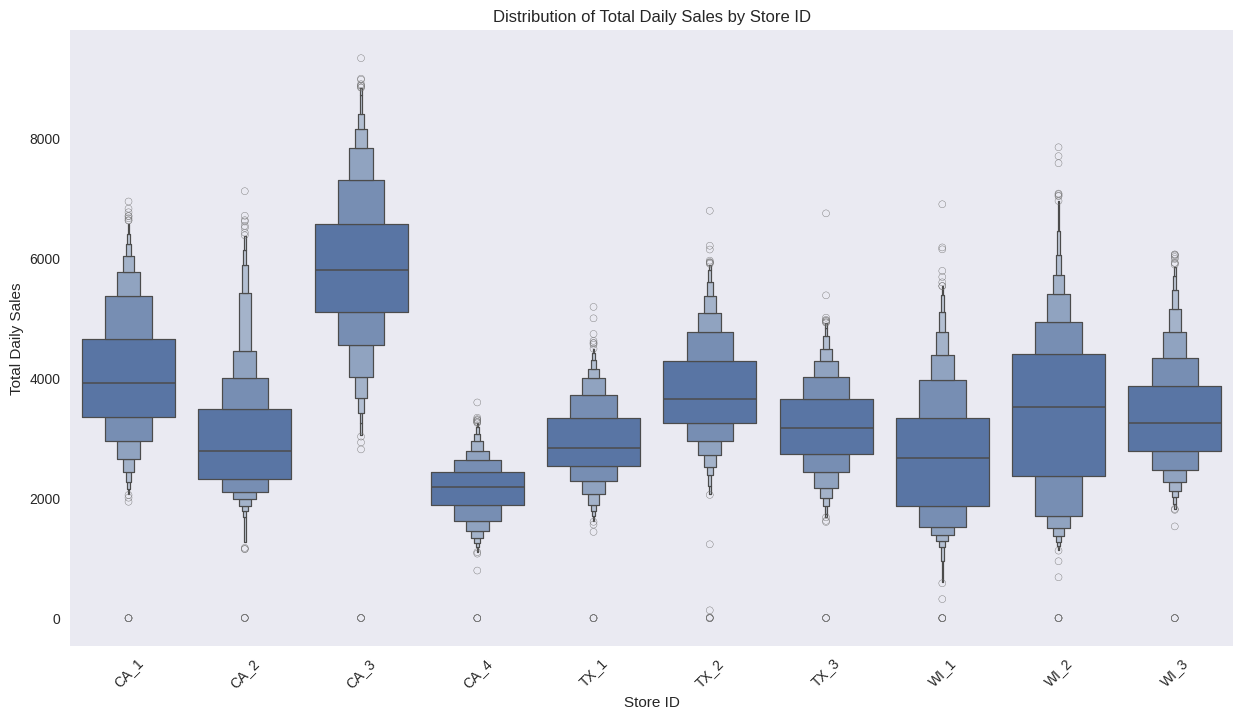

147

In [ ]:
daily_store_sales = sales_melted.groupby(['store_id', 'd'])['sales_count'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.boxenplot(x='store_id', y='sales_count', data=daily_store_sales)
plt.title('Distribution of Total Daily Sales by Store ID')
plt.xlabel('Store ID')
plt.ylabel('Total Daily Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

del daily_store_sales
gc.collect()

In [ ]:
# Merge calendar_processed with sales_melted on the 'd' column, keeping calendar on the left
sales_calendar_merged = pd.merge(calendar_processed, sales_melted, on='d', how='left')

print("Shape of the merged DataFrame:", sales_calendar_merged.shape)

Shape of the merged DataFrame: (59181118, 21)


### Sales by Product Category

/tmp/ipython-input-3658243659.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='cat_id', x='sales_count', data=sales_by_category, palette='viridis')


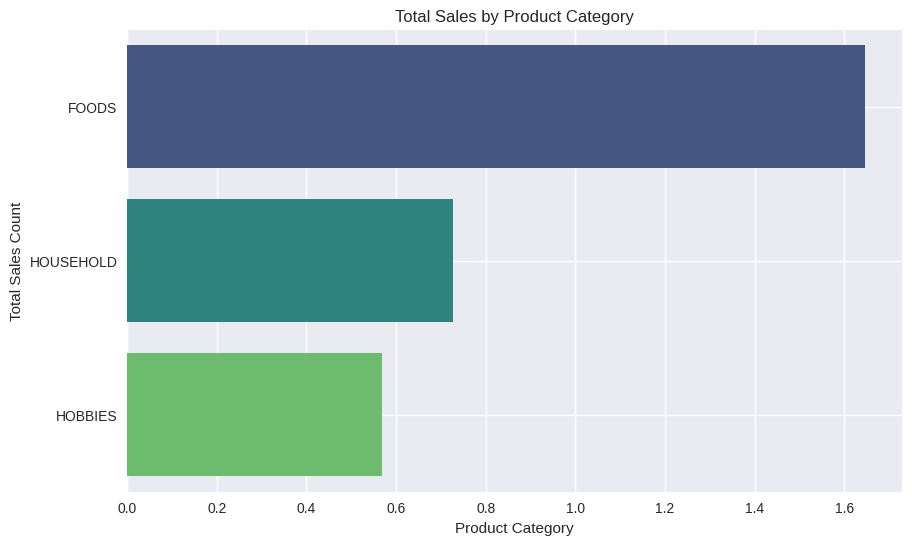

In [ ]:
sales_by_category = sales_calendar_merged.groupby('cat_id')['sales_count'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(y='cat_id', x='sales_count', data=sales_by_category, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Count')
plt.grid(axis='y')
plt.show()

### Daily Sales Patterns

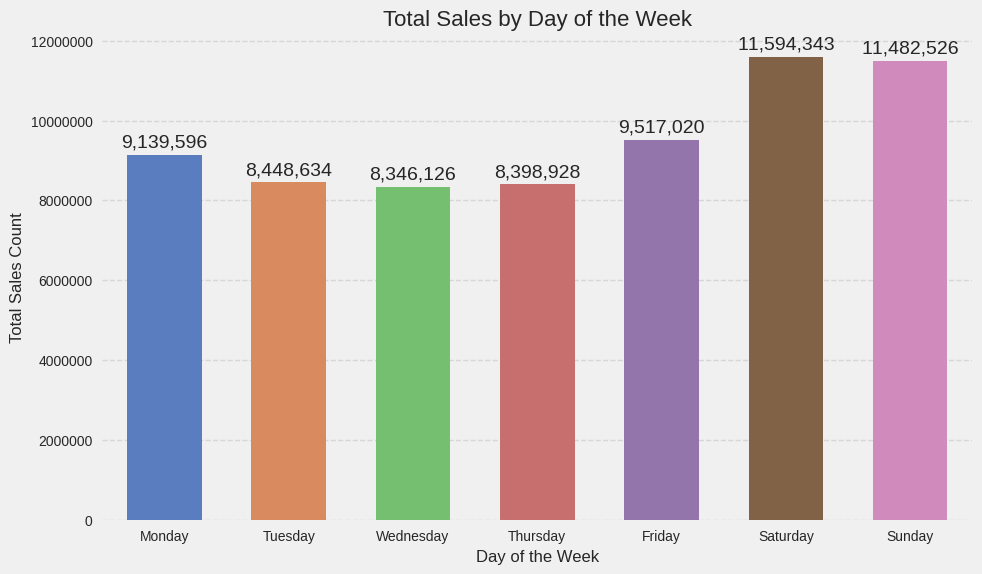

In [ ]:
sales_by_weekday = sales_calendar_merged.groupby('weekday')['sales_count'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

plt.style.use('fivethirtyeight')

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='weekday',
    y='sales_count',
    data=sales_by_weekday,
    palette='muted',
    hue='weekday',
    dodge=False,
    width=0.6)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.ticklabel_format(style='plain', axis='y')

plt.title('Total Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Sales Count', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)

### Impact of Events on Sales

/tmp/ipython-input-3118069949.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='event_name_1',


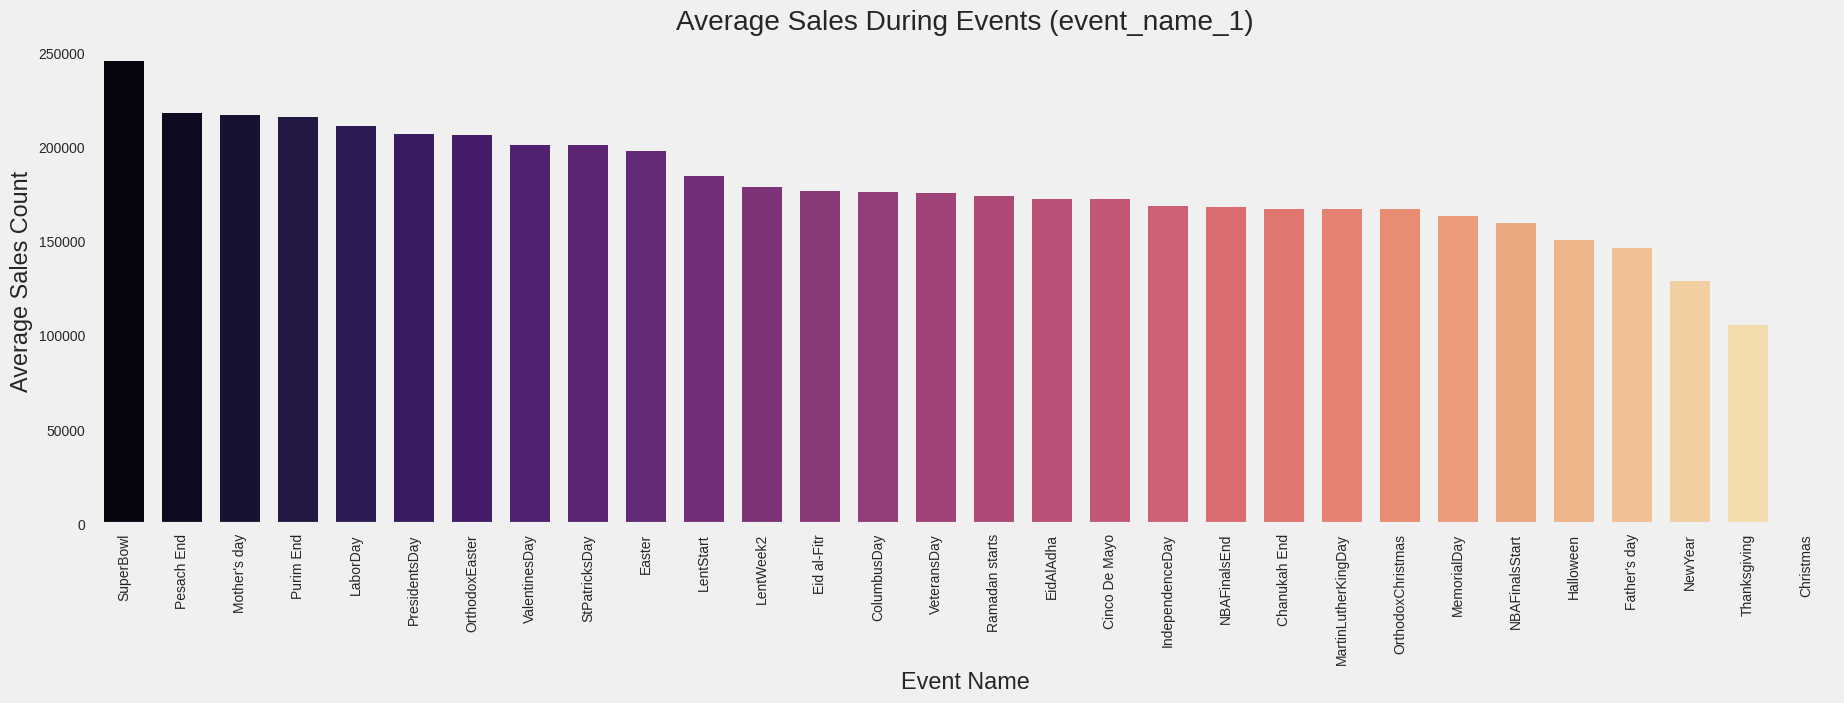

In [ ]:
event_sales = sales_calendar_merged[sales_calendar_merged['event_name_1'] != 'No Event']\
                                  .groupby('event_name_1')['sales_count'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(x='event_name_1',
            y='sales_count',
            data=event_sales,
            palette='magma',
            width=0.7)
plt.title('Average Sales During Events (event_name_1)')
plt.xlabel('Event Name')
plt.ylabel('Average Sales Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [ ]:
event_type_1_df = sales_calendar_merged[['event_type_1', 'sales_count']].copy()
event_type_1_df.rename(columns={'event_type_1': 'event_type'}, inplace=True)

event_type_2_df = sales_calendar_merged[['event_type_2', 'sales_count']].copy()
event_type_2_df.rename(columns={'event_type_2': 'event_type'}, inplace=True)

all_event_types_df = pd.concat([event_type_1_df, event_type_2_df], ignore_index=True)
all_event_types_df = all_event_types_df[all_event_types_df['event_type'] != 'No Event']

event_type_sales = all_event_types_df.groupby('event_type')['sales_count'].sum().sort_values(ascending=False).reset_index()

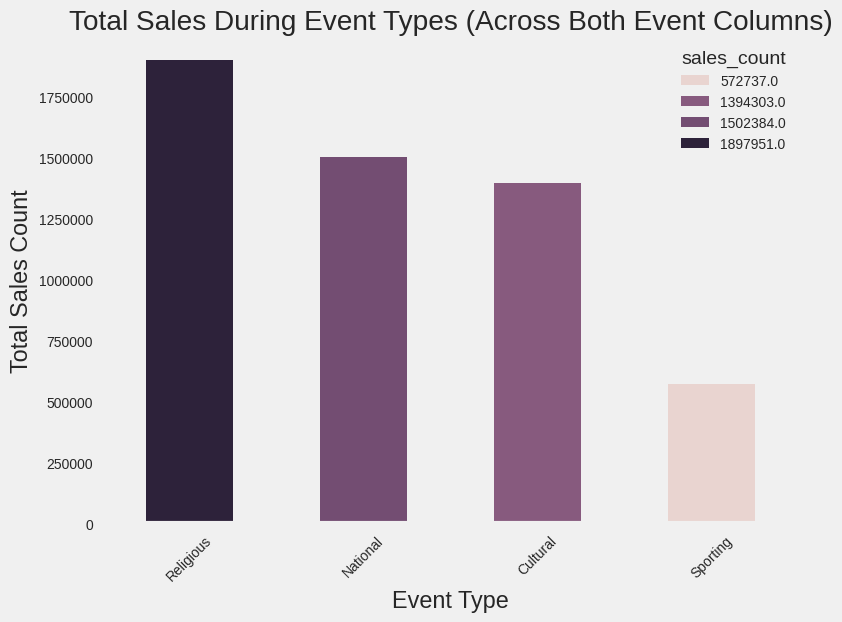

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x='event_type',
    y='sales_count',
    data=event_type_sales,
    hue='sales_count',
    width=0.5)
plt.title('Total Sales During Event Types (Across Both Event Columns)')
plt.xlabel('Event Type')
plt.ylabel('Total Sales Count')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
del calendar, calendar_processed, sales_melted, event_type_1_df, event_type_2_df, all_event_types_df, event_type_sales
gc.collect()

9365

In [ ]:
print("\nFirst 1 rows of the merged DataFrame:\n")
print(sales_calendar_merged.head(10).to_markdown())



First 1 rows of the merged DataFrame:

|    | date                |   wm_yr_wk | weekday   |   wday |   month |   year | d   | event_name_1   | event_type_1   | event_name_2   | event_type_2   |   snap_CA |   snap_TX |   snap_WI | id                            | item_id       | dept_id   | cat_id   | store_id   | state_id   |   sales_count |
|---:|:--------------------|-----------:|:----------|-------:|--------:|-------:|:----|:---------------|:---------------|:---------------|:---------------|----------:|----------:|----------:|:------------------------------|:--------------|:----------|:---------|:-----------|:-----------|--------------:|
|  0 | 2011-01-29 00:00:00 |      11101 | Saturday  |      1 |       1 |   2011 | d_1 | No Event       | No Event       | No Event       | No Event       |         0 |         0 |         0 | HOBBIES_1_001_CA_1_evaluation | HOBBIES_1_001 | HOBBIES_1 | HOBBIES  | CA_1       | CA         |             0 |
|  1 | 2011-01-29 00:00:00 |      11101 | Sat

In [ ]:
print("\nInformation about the merged DataFrame:\n")
sales_calendar_merged.info()


Information about the merged DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59181118 entries, 0 to 59181117
Data columns (total 21 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   wm_yr_wk      int16         
 2   weekday       object        
 3   wday          int8          
 4   month         int8          
 5   year          int16         
 6   d             object        
 7   event_name_1  object        
 8   event_type_1  object        
 9   event_name_2  object        
 10  event_type_2  object        
 11  snap_CA       int8          
 12  snap_TX       int8          
 13  snap_WI       int8          
 14  id            object        
 15  item_id       object        
 16  dept_id       object        
 17  cat_id        object        
 18  store_id      object        
 19  state_id      object        
 20  sales_count   float64       
dtypes: datetime64[ns](1), float64(1), int16(2), int8(5), obj

In [ ]:
total_daily_sales_state = sales_calendar_merged.groupby(['state_id', 'date'])['sales_count'].sum().reset_index()

print("Total daily sales per state (first 5 rows):\n")
print(total_daily_sales_state.head().to_markdown())

Total daily sales per state (first 5 rows):

|    | state_id   | date                |   sales_count |
|---:|:-----------|:--------------------|--------------:|
|  0 | CA         | 2011-01-29 00:00:00 |         14195 |
|  1 | CA         | 2011-01-30 00:00:00 |         13805 |
|  2 | CA         | 2011-01-31 00:00:00 |         10108 |
|  3 | CA         | 2011-02-01 00:00:00 |         11047 |
|  4 | CA         | 2011-02-02 00:00:00 |          9925 |


In [ ]:
stores_per_state = sales_calendar_merged.groupby('state_id')['store_id'].\
nunique().reset_index(name='num_stores')

print("Number of unique stores per state:\n")
print(stores_per_state.to_markdown(index=False))

Number of unique stores per state:

| state_id   |   num_stores |
|:-----------|-------------:|
| CA         |            4 |
| TX         |            3 |
| WI         |            3 |


In [ ]:
daily_state_sales_normalized = pd.merge(
    total_daily_sales_state,
    stores_per_state,
    on='state_id',
    how='left')

print("Merged DataFrame with store counts (first 5 rows):\n")
print(daily_state_sales_normalized.head().to_markdown())

Merged DataFrame with store counts (first 5 rows):

|    | state_id   | date                |   sales_count |   num_stores |
|---:|:-----------|:--------------------|--------------:|-------------:|
|  0 | CA         | 2011-01-29 00:00:00 |         14195 |            4 |
|  1 | CA         | 2011-01-30 00:00:00 |         13805 |            4 |
|  2 | CA         | 2011-01-31 00:00:00 |         10108 |            4 |
|  3 | CA         | 2011-02-01 00:00:00 |         11047 |            4 |
|  4 | CA         | 2011-02-02 00:00:00 |          9925 |            4 |


In [ ]:
daily_state_sales_normalized['avg_daily_sales_per_store'] = \
daily_state_sales_normalized['sales_count'] / daily_state_sales_normalized['num_stores']

daily_state_sales_normalized['rolling_avg_sales_30d'] = \
daily_state_sales_normalized.groupby('state_id')['avg_daily_sales_per_store'].\
transform(lambda x: x.rolling(window=30, min_periods=1).mean())

print("DataFrame with average daily sales per store (first 5 rows):")
print(daily_state_sales_normalized.head().to_markdown())

DataFrame with average daily sales per store (first 5 rows):
|    | state_id   | date                |   sales_count |   num_stores |   avg_daily_sales_per_store |   rolling_avg_sales_30d |
|---:|:-----------|:--------------------|--------------:|-------------:|----------------------------:|------------------------:|
|  0 | CA         | 2011-01-29 00:00:00 |         14195 |            4 |                     3548.75 |                 3548.75 |
|  1 | CA         | 2011-01-30 00:00:00 |         13805 |            4 |                     3451.25 |                 3500    |
|  2 | CA         | 2011-01-31 00:00:00 |         10108 |            4 |                     2527    |                 3175.67 |
|  3 | CA         | 2011-02-01 00:00:00 |         11047 |            4 |                     2761.75 |                 3072.19 |
|  4 | CA         | 2011-02-02 00:00:00 |          9925 |            4 |                     2481.25 |                 2954    |


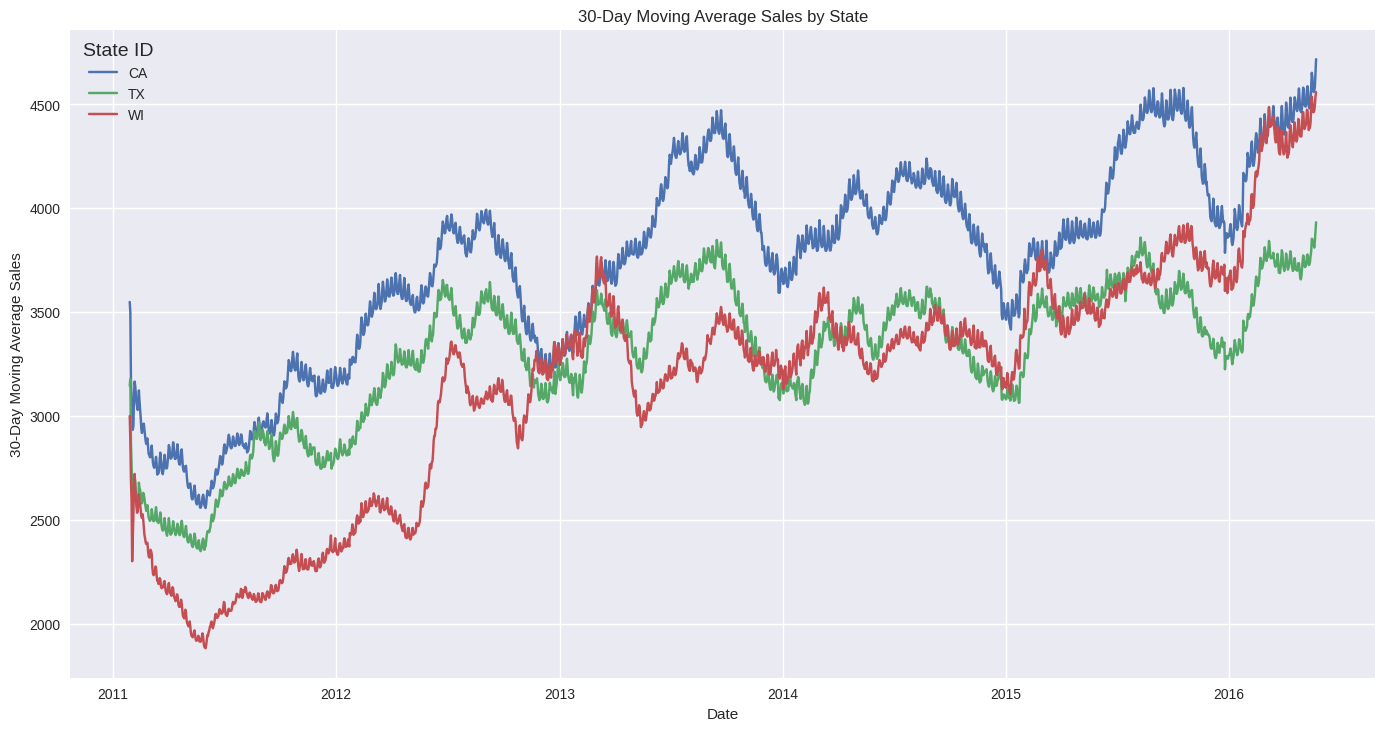

In [ ]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 8))
sns.lineplot(
    x='date',
    y='rolling_avg_sales_30d',
    hue='state_id',
    data=daily_state_sales_normalized
)
plt.title('30-Day Moving Average Sales by State')
plt.xlabel('Date')
plt.ylabel('30-Day Moving Average Sales')
plt.grid(True)
plt.legend(title='State ID')
plt.show()

In [ ]:
del total_daily_sales_state, daily_state_sales_normalized, stores_per_state
gc.collect()

16389

In [ ]:
total_daily_sales_by_year = sales_calendar_merged.groupby(['year', 'date'])['sales_count'].sum().reset_index()

print(total_daily_sales_by_year.head().to_markdown())


|    |   year | date                |   sales_count |
|---:|-------:|:--------------------|--------------:|
|  0 |   2011 | 2011-01-29 00:00:00 |         32631 |
|  1 |   2011 | 2011-01-30 00:00:00 |         31749 |
|  2 |   2011 | 2011-01-31 00:00:00 |         23783 |
|  3 |   2011 | 2011-02-01 00:00:00 |         25412 |
|  4 |   2011 | 2011-02-02 00:00:00 |         19146 |


/tmp/ipython-input-1081024644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cat_id', y='sales_count', data=sales_by_category, palette='viridis')


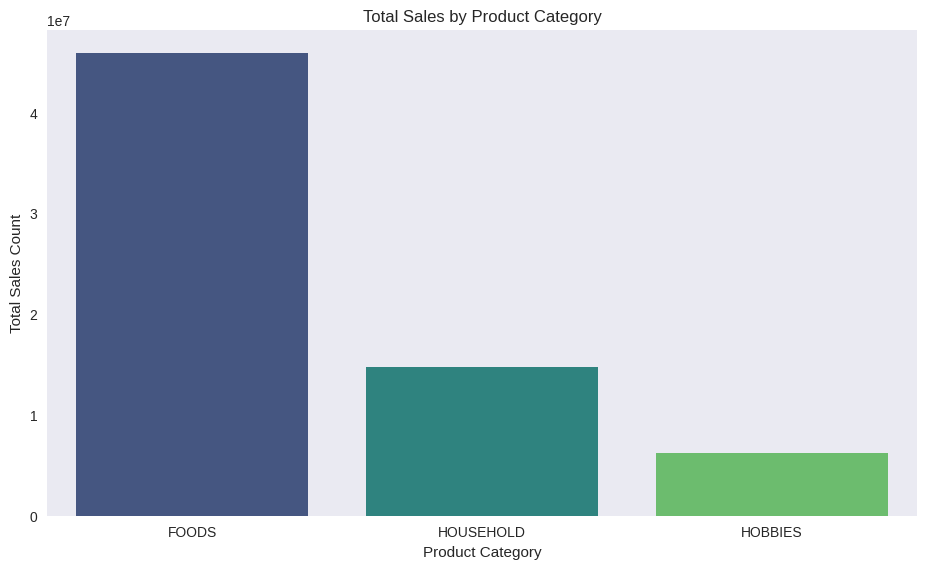

150

In [ ]:
sales_by_category = sales_calendar_merged.groupby('cat_id')['sales_count'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='cat_id', y='sales_count', data=sales_by_category, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Count')
plt.grid(axis='y')
plt.show()

del sales_by_category
gc.collect()

/tmp/ipython-input-3905298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='event_name_1', y='sales_count', data=event_sales, palette='magma')


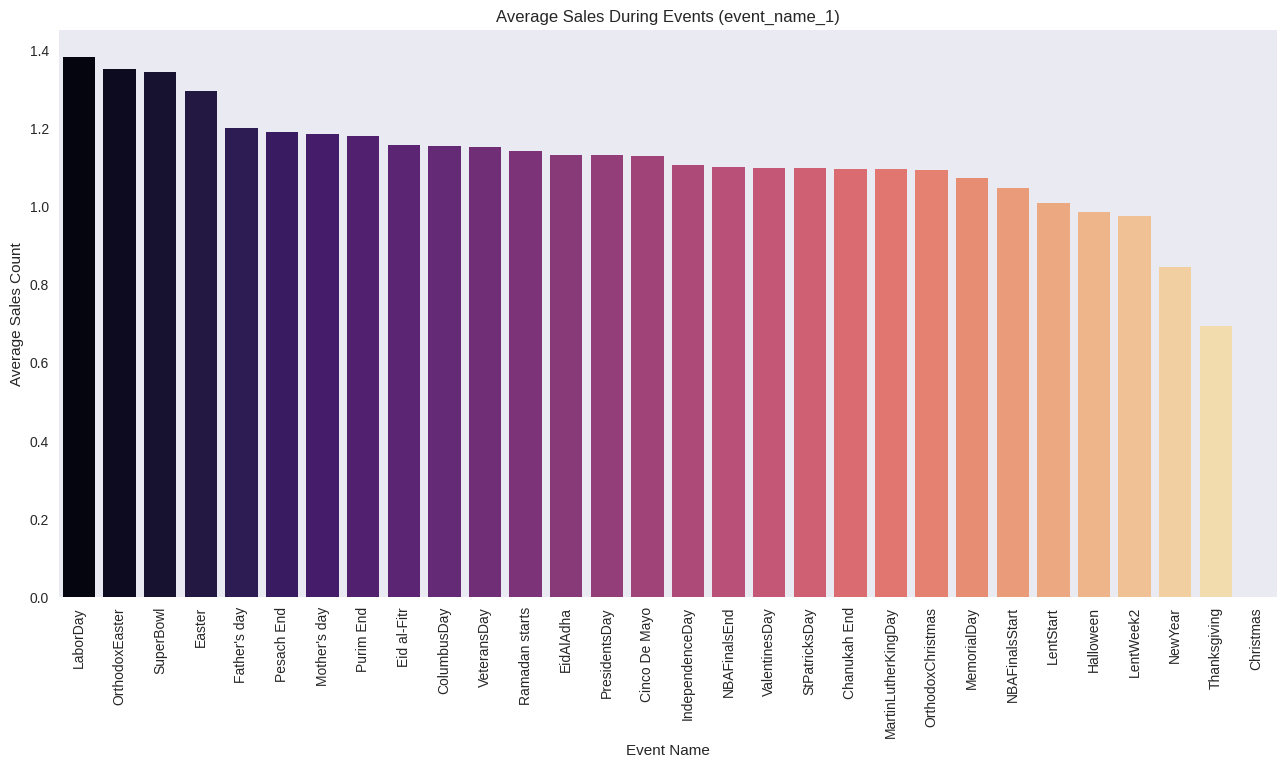

2778

In [ ]:
event_sales = sales_calendar_merged[sales_calendar_merged['event_name_1'] != 'No Event'].\
groupby('event_name_1')['sales_count'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='event_name_1', y='sales_count', data=event_sales, palette='magma')
plt.title('Average Sales During Events (event_name_1)')
plt.xlabel('Event Name')
plt.ylabel('Average Sales Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

del event_sales
gc.collect()

In [ ]:
print("\nCreating state-level daily sales files...")

# Define the columns to group by (all calendar-related columns)
calendar_cols = [
    'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
    'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
    'snap_CA', 'snap_TX', 'snap_WI'
]

# Group by state and calendar columns, then sum sales
daily_sales_by_state = sales_calendar_merged.\
groupby(['state_id'] + calendar_cols)['sales_count'].sum().reset_index()

states = daily_sales_by_state['state_id'].unique()

OUTPUT_PATH = '/content/drive/MyDrive/SU Works/CPSC_5305_Intro_to_DS/Rizvans Works/Saved Data'

# Loop through each state and save its data to a separate CSV file
for state in states:
    state_df = daily_sales_by_state[daily_sales_by_state['state_id'] == state]
    file_name = f'daily_sales_{state}.csv'
    file_path = os.path.join(OUTPUT_PATH, file_name)
    state_df.to_csv(file_path, index=False)
    print(f'Successfully saved {file_name} with shape {state_df.shape}')

# Clean up memory
del daily_sales_by_state
gc.collect()


Creating state-level daily sales files...
Successfully saved daily_sales_CA.csv with shape (1941, 16)
Successfully saved daily_sales_TX.csv with shape (1941, 16)
Successfully saved daily_sales_WI.csv with shape (1941, 16)


8835

In [ ]:
#


Creating store-level daily sales files...


KeyboardInterrupt: 

In [55]:
print(sell_prices.head().to_markdown())

|    | store_id   | item_id       |   wm_yr_wk |   sell_price |
|---:|:-----------|:--------------|-----------:|-------------:|
|  0 | CA_1       | HOBBIES_1_001 |      11325 |         9.58 |
|  1 | CA_1       | HOBBIES_1_001 |      11326 |         9.58 |
|  2 | CA_1       | HOBBIES_1_001 |      11327 |         8.26 |
|  3 | CA_1       | HOBBIES_1_001 |      11328 |         8.26 |
|  4 | CA_1       | HOBBIES_1_001 |      11329 |         8.26 |


In [57]:
num_zero_prices = (sell_prices['sell_price'] == 0).sum()
num_missing_prices = sell_prices['sell_price'].isna().sum()

print(f"Number of 0 values in 'sell_price': {num_zero_prices}")
print(f"Number of missing values in 'sell_price': {num_missing_prices}")

Number of 0 values in 'sell_price': 0
Number of missing values in 'sell_price': 0


In [59]:
print(sell_prices.drop(columns=['wm_yr_wk']).describe().to_string(float_format='%.2f'))

       sell_price
count  6841121.00
mean         4.41
std          3.39
min          0.01
25%          2.18
50%          3.47
75%          5.84
max        107.32
